# Modélisation du marché financier à l'aide du Modèle de Kyle

L'objectif est de modéliser comment le prix d'un actif consolide avant de prendre une certaine tendance, en tenant compte des fluctuations causées par l'information asymétrique. Nous modéliserons les périodes de consolidation où les noise traders dominent (avec une grande volatilité $\sigma_n$) et les chocs d'information où l'insider réagit à de nouvelles informations (avec une grande volatilité $\sigma_P$).

## Hypothèses et Notations

- **$P$** : valeur réelle de l'actif, modélisée comme une variable aléatoire.
- **$V$** : volume d'ordre de l'insider, proportionnel à la valeur de l'actif, soit $V = \beta P$.
- **$n$** : volume d'ordres des noise traders, modélisé comme une variable aléatoire indépendante de $P$.
- **$Y$** : demande totale observée par les market makers, soit $Y = V + n = \beta P + n$.
- **$h(Y)$** : prix de marché fixé par les market makers, dépendant de la demande totale $Y$.
Nous supposons que :

- $P \sim \mathcal{N}(0, \sigma_P^2)$
- $n \sim \mathcal{N}(0, \sigma_n^2)$

Nous supposons que :

- Le volume d'ordre de l'insider est lineaire en $P$ :

$$
V = \beta \cdot P + b
$$

- Le prix fixé par les market makers est lineaire en $Y$ :

$$
h(Y) = \lambda \cdot Y  + a
$$

Nous obtenons les résultats théoriques suivants pour les paramètres optimaux :

  $$
  a = b = 0, \quad \beta = \frac{\sigma_n}{\sigma_P}, \quad \lambda = \frac{\sigma_P}{2\sigma_n}
  $$


## Modélisation de la consolidation et des chocs d'information

1. **Période de consolidation** : pendant cette phase, la volatilité des noise traders est plus élevée que celle de l'insider, soit $\sigma_n \gg \sigma_P$. Cela signifie que l'insider ne dispose pas d'informations significatives pour influencer le prix, et le marché est dominé par les noise traders.

2. **Choc d'information** : à un moment donné, l'insider reçoit une information importante (comme une nouvelle économique) qui augmente la volatilité de $P$, soit $\sigma_P \gg \sigma_n$. Cela conduit à une explosion du prix de marché, souvent suivie d'un phénomène de **sur-réaction** ou **overshoot**, où le prix dépasse temporairement la valeur réelle avant de revenir vers celle-ci.

3. **Périodes glissantes de 3 heures** : pour simuler ces phases, les variances $\sigma_P$ et $\sigma_n$ changent toutes les 3 heures. Pendant la consolidation, $\sigma_n \gg \sigma_P$, et pendant le choc d'information, $\sigma_P \gg \sigma_n$.

## Calcul du paramètre $\lambda$

Le paramètre $\lambda$ représente la sensibilité du prix du marché aux volumes d'ordre observés $Y$. $\lambda$ est calculé comme le rapport de la covariance entre $P$ et $Y$ sur la variance de $Y$ :

$
\lambda = \frac{\text{Cov}(P, Y)}{\text{Var}(Y)}
$

### Calcul détaillé :

1. **Variance de $Y$** : 
   $
   \text{Var}(Y) = \beta^2 \text{Var}(P) + \text{Var}(n) = \beta^2 \sigma_P^2 + \sigma_n^2
   $
   
2. **Covariance entre $P$ et $Y$** :
   $
   \text{Cov}(P, Y) = \text{Cov}(P, \beta P + n) = \text{Cov}(P, \beta P) + \text{Cov}(P, n)  = \beta \text{Cov}(P, P) = \beta \sigma_P^2
   $
   
3. **Valeur de $\lambda$** :
   $
   \lambda = \frac{\beta \sigma_P^2}{\beta^2 \sigma_P^2 + \sigma_n^2}
   $

En substituant la valeur de $\beta = \frac{\sigma_n}{\sigma_P}$, nous obtenons :
$
\lambda = \frac{\sigma_P}{2 \sigma_n}
$

## Implémentation en Python

L'implémentation suit ces étapes :

1. Générer des valeurs aléatoires pour $P$ et $n$ en fonction des variances $\sigma_P$ et $\sigma_n$.
2. Calculer la demande totale $Y = V + n$, où $V = \beta P$.
3. Calculer le prix de marché $h(Y) = \lambda Y$ à chaque instant.
4. Ajuster $\lambda$ dynamiquement en fonction des changements de $\sigma_P$ et $\sigma_n$ toutes les 3 heures.
5. Simuler la réaction des market makers avec une fenêtre glissante de 4 heures pour inclure les informations précédentes dans la fixation des prix.


## 1. Changement des valeurs de $\sigma$ chaque 3 heures

Dans notre implémentation, nous simulons des périodes où la volatilité des noise traders ($\sigma_n$) est généralement élevée, et celle de l'insider ($\sigma_P$) est faible, représentant une phase de **consolidation** du marché. Toutefois, toutes les 3 heures, les valeurs de $\sigma_P$ et $\sigma_n$ peuvent changer, avec un intervalle clé où la valeur de $\sigma_P$ devient soudainement beaucoup plus grande que celle de $\sigma_n$. Cela simule l'arrivée d'une nouvelle information importante que seul l'insider connaît. 

Cette dynamique se traduit par un choc sur le prix du marché, où la volatilité de l'actif sous-jacent augmente, et le prix peut connaître un sursaut avant de revenir vers sa valeur fondamentale.

### Pourquoi un changement toutes les 3 heures ?

Les intervalles de 3 heures permettent de simuler des cycles de **consolidation** suivis de **chocs d'information**, où l'insider réagit de manière agressive à de nouvelles informations, augmentant ainsi la volatilité de l'actif ($\sigma_P$). Les noise traders, quant à eux, continuent d'agir de manière aléatoire, mais leur influence diminue pendant ces périodes.

## 2. Structure de donnée utilisée : `TimeSlice = namedtuple`

Nous utilisons une structure de données **`TimeSlice`** définie avec un `namedtuple` pour représenter chaque point de temps dans la simulation. Cette structure contient trois informations principales :

- $t$ : le temps de simulation en heures.
- $P$ : la valeur réelle de l'actif (modélisée comme une variable aléatoire avec une volatilité $\sigma_P$).
- $n$ : les volumes d'ordres des noise traders (également modélisés aléatoirement avec une volatilité $\sigma_n$).

Cette structure facilite la gestion des données temporelles tout en maintenant une organisation claire des variables à chaque instant. Elle permet également de capturer l'évolution de l'actif et des ordres de manière dynamique au fil du temps.

## 3. Réponse du market maker avec une fenêtre glissante

Les **market makers** ne réagissent pas uniquement aux informations instantanées. Ils observent les données sur une **fenêtre glissante** de 4 heures (définie par `window_duration = 4`). Cela signifie que, pour chaque instant $t$, ils utilisent les informations des 4 dernières heures pour déterminer la demande totale $Y$ et ajuster leur stratégie de pricing.

### Pourquoi une fenêtre glissante ?

L'utilisation d'une fenêtre glissante permet de lisser les variations des ordres et d'intégrer les informations passées dans la décision de fixer le prix. Cela reflète la réalité où les **market makers** ne se basent pas uniquement sur les informations actuelles mais tiennent compte des tendances récentes pour établir un prix cohérent. Cela permet aussi de réduire l'impact des fluctuations très courtes et aléatoires.

## 4. Calcul de $\lambda$ (sensibilité des prix)

Le paramètre $\lambda$ est crucial dans le modèle de Kyle car il mesure la **sensibilité** du prix au volume d'ordre observé. 

Le calcul de $\lambda$ se fait en utilisant la covariance entre $P$ (la valeur réelle de l'actif) et $Y$ (la demande totale), divisée par la variance de $Y$ :

$
\lambda = \frac{\text{Cov}(P, Y)}{\text{Var}(Y)}
$

Dans notre simulation, $\lambda$ est calculé dynamiquement à chaque étape en fonction des valeurs de $\sigma_P$ et $\sigma_n$ actuelles, ce qui permet aux **market makers** d'ajuster leur prix en fonction de l'évolution des volumes d'ordre et des fluctuations de la valeur de l'actif. 

Ce calcul prend en compte la relation linéaire entre le volume d'ordre de l'insider $V$ et la valeur réelle $P$, avec $\beta = \frac{\sigma_n}{\sigma_P}$.

## 5. Pourquoi représenter les valeurs cumulées ?

La représentation des valeurs **cumulées** (à la fois pour les prix de marché et les profits) permet de visualiser l'impact global des fluctuations sur une longue période. Plutôt que d'observer les variations individuelles instantanées, la somme cumulée des prix ou des profits donne une meilleure idée de la **tendance générale** du marché.

### Pourquoi cumuler les prix ?

Cumuler les prix permet de détecter les **tendances** haussières ou baissières sur le long terme. Dans notre cas, cela permet de capturer des phénomènes tels que l'**overshoot** du prix après un choc d'information, ainsi que la **convergence** vers la valeur réelle de l'actif à mesure que le marché absorbe les informations.

### Pourquoi cumuler les profits de l'insider ?

En représentant le profit cumulé de l'insider, on observe comment ses décisions stratégiques (basées sur son information privilégiée) lui permettent d'accumuler un profit au fil du temps. Le cumul des profits est une bonne mesure de la **performance globale** de l'insider sur toute la durée de la simulation.

## Conclusion

Cette approche combine plusieurs éléments réalistes du modèle de Kyle : la dynamique de marché basée sur des informations asymétriques, l'influence des noise traders, et la réaction des market makers sur des fenêtres glissantes. Chaque composant est ajusté en fonction de paramètres volatils comme $\sigma_P$ et $\sigma_n$, et la visualisation des valeurs cumulées permet de mieux comprendre l'évolution des prix et des profits sur une période prolongée.


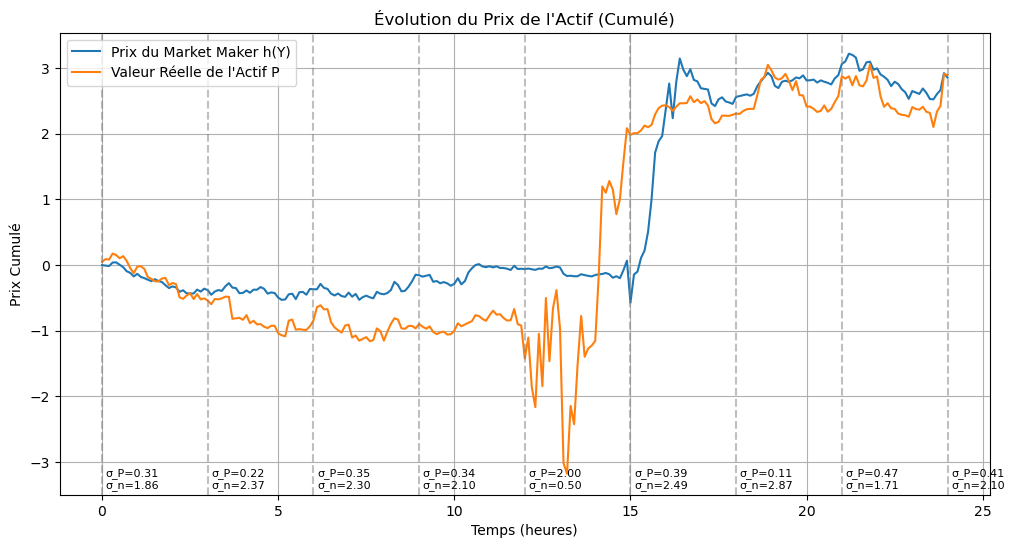

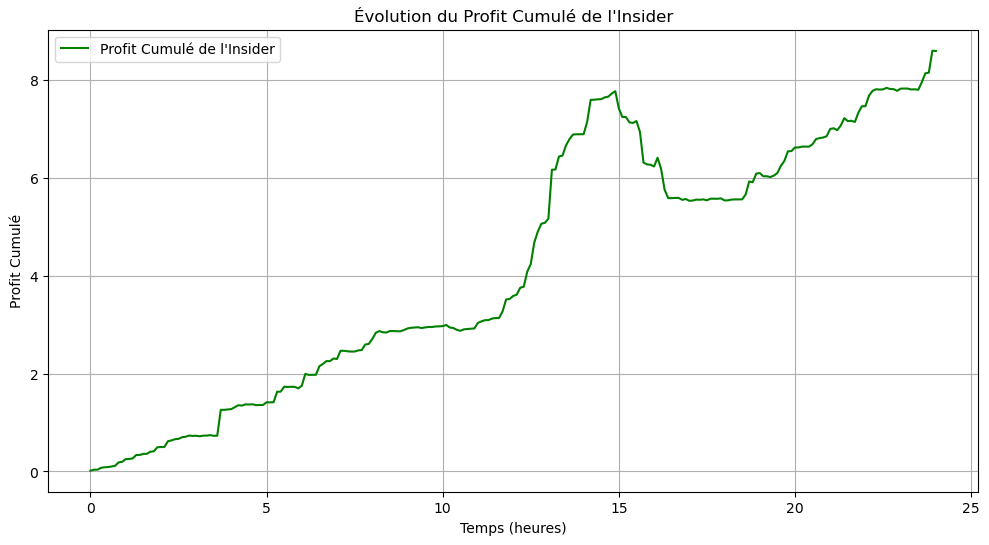

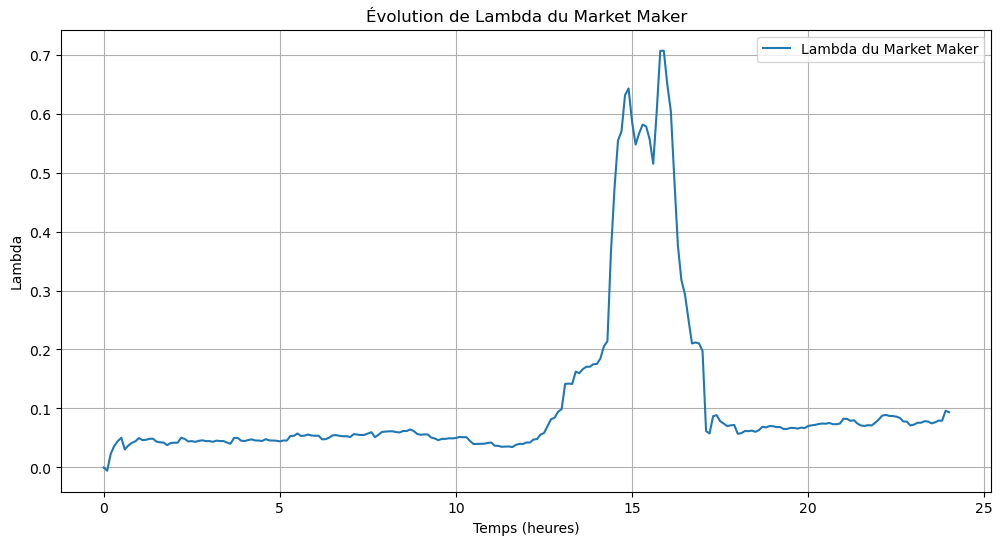

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# Définir la structure TimeSlice
TimeSlice = namedtuple('TimeSlice', ['t', 'P', 'n'])

# Paramètres de simulation
total_hours = 24     # Durée totale de la simulation en heures
delta_t = 0.1        # Pas de temps en heures (6 minutes)
times = np.arange(0, total_hours + delta_t, delta_t)  # Liste des temps

# Durée des intervalles de 3 heures
interval_length = 3
interval_points = int(interval_length / delta_t)

# Définir les sigmas pour chaque temps
sigma_P_values = []
sigma_n_values = []
interval_boundaries = []  # To store the interval boundaries for plotting

for i, t in enumerate(times):
    # Enregistrer les limites des intervalles de 3 heures
    if i % interval_points == 0:
        interval_boundaries.append(t)

    # Pendant l'événement (par exemple, de la 12ème à la 15ème heure)
    if 12 <= t < 15:
        sigma_P = 2.0  # Volatilité élevée de P
        sigma_n = 0.5  # Volatilité faible des noise traders
    else:
        sigma_P = np.random.uniform(0.1, 0.5)  # Volatilité faible pour P
        sigma_n = np.random.uniform(1.5, 3.0)  # Volatilité élevée pour noise traders
    
    sigma_P_values.append(sigma_P)
    sigma_n_values.append(sigma_n)

# Vérifier que les listes ont la bonne longueur
assert len(sigma_P_values) == len(times)
assert len(sigma_n_values) == len(times)

# Générer les valeurs de P et n pour chaque temps
P_values = []
n_values = []

np.random.seed(42)  # Pour la reproductibilité

for sigma_P, sigma_n in zip(sigma_P_values, sigma_n_values):
    P = np.random.normal(0, sigma_P * np.sqrt(delta_t))
    n = np.random.normal(0, sigma_n * np.sqrt(delta_t))
    P_values.append(P)
    n_values.append(n)

# Créer la liste des TimeSlice
Sim = [TimeSlice(t=t, P=P, n=n) for t, P, n in zip(times, P_values, n_values)]

# Calculer la taille de la fenêtre glissante
window_duration = 4  # Durée de la fenêtre en heures
window_size = int(window_duration / delta_t)  # Taille de la fenêtre en nombre de points

# Initialiser les listes pour stocker les valeurs de lambda, h(Y), V, Y et profit de l'insider
lambda_values = []
h_Y_values = []
V_values = []
Y_values = []
insider_profits = []

for i in range(len(Sim)):
    # Obtenir le TimeSlice actuel
    ts = Sim[i]
    
    # Définir la fenêtre
    start_index = max(0, i - window_size + 1)
    window = Sim[start_index:i+1]
    
    # Extraire les valeurs de P et n dans la fenêtre
    P_window = np.array([tsw.P for tsw in window])
    n_window = np.array([tsw.n for tsw in window])
    
    # Calculer le beta pour chaque TimeSlice dans la fenêtre en fonction de sigma_P et sigma_n
    beta_window = np.array([sigma_n_values[start_index + j] / sigma_P_values[start_index + j] for j in range(len(window))])
    V_window = beta_window * P_window  # Utiliser beta variable dans la fenêtre
    
    # Calculer V pour le temps actuel
    beta_current = sigma_n_values[i] / sigma_P_values[i]  # Beta correspondant au temps actuel
    V_current = beta_current * ts.P
    V_values.append(V_current)
    
    # Calculer Y dans la fenêtre
    Y_window = V_window + n_window
    Y_current = V_current + ts.n
    Y_values.append(Y_current)
    
    # Calculer lambda du market maker
    if len(Y_window) > 1:
        cov_PY = np.cov(P_window, Y_window, bias=True)[0, 1]
        var_Y = np.var(Y_window)
        lambda_mm = cov_PY / var_Y if var_Y != 0 else 0.0
    else:
        lambda_mm = 0.0  # Valeur initiale
    
    lambda_values.append(lambda_mm)
    
    # Calculer h(Y) pour le temps actuel
    h_Y = lambda_mm * Y_current
    h_Y_values.append(h_Y)
    
    # Calculer le profit de l'insider: (P - h(Y)) * V
    insider_profit = (ts.P - h_Y) * V_current
    insider_profits.append(insider_profit)

# Calculer les prix cumulés
market_prices_cumulative = np.cumsum(h_Y_values)
true_values_cumulative = np.cumsum([ts.P for ts in Sim])

# Calculer le profit cumulé de l'insider
cumulative_insider_profits = np.cumsum(insider_profits)

# Tracer les prix cumulés
plt.figure(figsize=(12, 6))
plt.plot(times, market_prices_cumulative, label='Prix du Market Maker h(Y)')
plt.plot(times, true_values_cumulative, label='Valeur Réelle de l\'Actif P')

# Ajouter des lignes verticales pour chaque changement d'intervalle de 3 heures
for boundary in interval_boundaries:
    plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
    idx = int(boundary / delta_t)  # Index du point de la borne
    
    # Ajouter les textes en bas du graphique, avec saut de ligne entre σ_P et σ_n
    plt.text(boundary + 0.1, np.min(true_values_cumulative) * 1.07, 
             f'σ_P={sigma_P_values[idx]:.2f}\nσ_n={sigma_n_values[idx]:.2f}', 
             horizontalalignment='left', fontsize=8, color='black')

plt.xlabel('Temps (heures)')
plt.ylabel('Prix Cumulé')
plt.title('Évolution du Prix de l\'Actif (Cumulé)')
plt.legend()
plt.grid(True)
plt.show()

# Visualiser l'évolution du profit cumulé de l'insider
plt.figure(figsize=(12, 6))
plt.plot(times, cumulative_insider_profits, label='Profit Cumulé de l\'Insider', color='green')
plt.xlabel('Temps (heures)')
plt.ylabel('Profit Cumulé')
plt.title('Évolution du Profit Cumulé de l\'Insider')
plt.legend()
plt.grid(True)
plt.show()

# Visualiser l'évolution de lambda
plt.figure(figsize=(12, 6))
plt.plot(times, lambda_values, label='Lambda du Market Maker')
plt.xlabel('Temps (heures)')
plt.ylabel('Lambda')
plt.title('Évolution de Lambda du Market Maker')
plt.legend()
plt.grid(True)
plt.show()
